# Prediction By Neural Networks

### Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [55]:
ticker = "NZDUSD=X"
supporting_predictor_names = [
    'RAW-EMA-2',
    'RAW-EMA-3',
    'RAW-EMA-5',
    'RAW-EMA-7',
    'RAW-EMA-21',
    'RAW-EMA-50'
]

## Pre Algorithm

### Read Dataset

In [56]:
predictors = pd.read_csv('./' + ticker + '_input_signals.csv')
predictors_list = list(predictors.columns)
supporting_predictors = predictors[supporting_predictor_names]
predictors = predictors.drop(supporting_predictor_names, axis = 1)
predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.000200,0.008570,0.020727,0.676821,-0.000012,0.443293,0.001506,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.000165,0.007809,0.019934,0.677012,-0.000312,0.448389,0.001548,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,-0.001699,0.004889,0.016817,0.627907,-0.000714,0.445866,0.001813,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.004545,0.011499,0.023613,0.702180,-0.000507,0.446968,0.002553,0.010210,-0.000365,-0.009845


In [57]:
target = pd.read_csv('./' + ticker + '_output_signals.csv')
# target

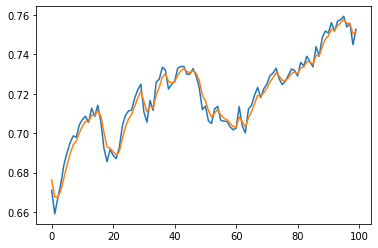

In [58]:
adj_close = predictors["Adj Close"].to_numpy()[1000:1100]
ema = supporting_predictors["RAW-EMA-3"].to_numpy()[1000:1100]

plt.plot(adj_close)
plt.plot(ema)

### Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
train_predictors, test_predictors, train_targets, test_targets = train_test_split(
        predictors,
        target,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [60]:
train_predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.711389,0.721397,0.706115,0.711389,0.711389,0,0.002049,0.004421,0.008140,0.008589,...,0.005383,0.011778,0.012642,0.702257,0.001591,0.269600,0.003351,0.013403,-0.002062,-0.011341
2973,0.708918,0.713089,0.708898,0.708818,0.708818,0,-0.002572,-0.000523,0.001849,0.005568,...,0.002108,0.008369,0.009676,0.649917,0.001377,0.291316,0.002741,0.010965,-0.004618,-0.006347
2974,0.710071,0.711389,0.707469,0.710021,0.710021,0,0.001203,-0.001369,0.000680,0.003052,...,0.002483,0.008702,0.010452,0.662584,0.001218,0.306916,0.001453,0.005811,-0.002193,-0.003619
2975,0.708848,0.715129,0.707569,0.709019,0.709019,0,-0.001002,0.000201,-0.002371,-0.000322,...,0.001111,0.007000,0.009080,0.641756,0.000959,0.324997,0.000930,0.003721,-0.002559,-0.001162


### More Preprocessing

In [61]:
train_targets = np.ravel(train_targets)
test_targets = np.ravel(test_targets)

### Utility

In [191]:
def normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

In [71]:
import matplotlib.pyplot as plt
def show_training_validation_graph(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Algorithm 1 - Neural Networks

In [62]:
# Imports
import keras
from keras import models
from keras import layers

In [63]:
# Training Validation Split
the_train_predictors, test_validation_predictors, the_train_targets, test_validation_targets = train_test_split(
        train_predictors,
        train_targets,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [64]:
print("Features : " + str(train_predictors.shape[1]))
print("Training Set : " + str(train_predictors.shape[0]))

Features : 24
Training Set : 2977


In [412]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(train_predictors.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    the_train_predictors,
    the_train_targets,
    epochs=1000,
    batch_size=512,
    validation_data=(test_validation_predictors, test_validation_targets)
)

Epoch 1/1000
5/5 [==============================] - 4s 170ms/step - loss: 0.6657 - accuracy: 0.5562 - val_loss: 0.4647 - val_accuracy: 0.9027
Epoch 2/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.4192 - accuracy: 0.9047 - val_loss: 0.3406 - val_accuracy: 0.9027
Epoch 3/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.3272 - accuracy: 0.9032 - val_loss: 0.3139 - val_accuracy: 0.9027
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.3064 - accuracy: 0.9059 - val_loss: 0.3105 - val_accuracy: 0.9027
Epoch 5/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.3094 - accuracy: 0.9034 - val_loss: 0.3092 - val_accuracy: 0.9027
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3292 - accuracy: 0.8940 - val_loss: 0.3099 - val_accuracy: 0.9027
Epoch 7/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3122 - accuracy: 0.9026 - val_loss: 0.3070 - val_accuracy: 0.9027
Epoch 8/1000

Epoch 59/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.2760 - accuracy: 0.9009 - val_loss: 0.2631 - val_accuracy: 0.9027
Epoch 60/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2644 - accuracy: 0.9051 - val_loss: 0.2678 - val_accuracy: 0.9027
Epoch 61/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.2662 - accuracy: 0.9054 - val_loss: 0.2713 - val_accuracy: 0.9027
Epoch 62/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2542 - accuracy: 0.9087 - val_loss: 0.2696 - val_accuracy: 0.9027
Epoch 63/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.2424 - accuracy: 0.9138 - val_loss: 0.2615 - val_accuracy: 0.9027
Epoch 64/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2616 - accuracy: 0.9019 - val_loss: 0.2638 - val_accuracy: 0.9027
Epoch 65/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2599 - accuracy: 0.9069 - val_loss: 0.2631 - val_accuracy: 0.9027
Epoch 

5/5 [==============================] - 0s 14ms/step - loss: 0.2480 - accuracy: 0.9060 - val_loss: 0.2385 - val_accuracy: 0.9027
Epoch 117/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2443 - accuracy: 0.9037 - val_loss: 0.2447 - val_accuracy: 0.9027
Epoch 118/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2370 - accuracy: 0.9086 - val_loss: 0.2365 - val_accuracy: 0.9027
Epoch 119/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2394 - accuracy: 0.9061 - val_loss: 0.2606 - val_accuracy: 0.9027
Epoch 120/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.2471 - accuracy: 0.9071 - val_loss: 0.2511 - val_accuracy: 0.9027
Epoch 121/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.2433 - accuracy: 0.9039 - val_loss: 0.2362 - val_accuracy: 0.9027
Epoch 122/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2359 - accuracy: 0.9081 - val_loss: 0.2448 - val_accuracy: 0.9027
Epoch 123/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.2322 - accuracy: 0.9076 - val_loss: 0.2769 - val_accuracy: 0.9027
Epoch 174/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.2481 - accuracy: 0.9054 - val_loss: 0.2302 - val_accuracy: 0.9027
Epoch 175/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2342 - accuracy: 0.9067 - val_loss: 0.2296 - val_accuracy: 0.9027
Epoch 176/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.2486 - accuracy: 0.9012 - val_loss: 0.2260 - val_accuracy: 0.9027
Epoch 177/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.2245 - accuracy: 0.9099 - val_loss: 0.2243 - val_accuracy: 0.9027
Epoch 178/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.2241 - accuracy: 0.9104 - val_loss: 0.2234 - val_accuracy: 0.9027
Epoch 179/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.2294 - accuracy: 0.9052 - val_loss: 0.2864 - val_accuracy: 0.9027
Epoch 180/1000

5/5 [==============================] - 0s 19ms/step - loss: 0.2260 - accuracy: 0.9090 - val_loss: 0.2203 - val_accuracy: 0.9027
Epoch 231/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2324 - accuracy: 0.9045 - val_loss: 0.2190 - val_accuracy: 0.9027
Epoch 232/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2241 - accuracy: 0.9091 - val_loss: 0.2647 - val_accuracy: 0.9027
Epoch 233/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2285 - accuracy: 0.9120 - val_loss: 0.2372 - val_accuracy: 0.9027
Epoch 234/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2321 - accuracy: 0.9020 - val_loss: 0.2451 - val_accuracy: 0.9027
Epoch 235/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.2335 - accuracy: 0.9100 - val_loss: 0.2330 - val_accuracy: 0.9027
Epoch 236/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.2275 - accuracy: 0.9068 - val_loss: 0.2215 - val_accuracy: 0.9027
Epoch 237/1000

5/5 [==============================] - 0s 15ms/step - loss: 0.2261 - accuracy: 0.9035 - val_loss: 0.2236 - val_accuracy: 0.9027
Epoch 288/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2313 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9027
Epoch 289/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.2216 - accuracy: 0.9081 - val_loss: 0.2554 - val_accuracy: 0.9027
Epoch 290/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2386 - accuracy: 0.9043 - val_loss: 0.2217 - val_accuracy: 0.9027
Epoch 291/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2281 - accuracy: 0.9069 - val_loss: 0.2189 - val_accuracy: 0.9027
Epoch 292/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2213 - accuracy: 0.9068 - val_loss: 0.2479 - val_accuracy: 0.9027
Epoch 293/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.2348 - accuracy: 0.9022 - val_loss: 0.2318 - val_accuracy: 0.9027
Epoch 294/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.2145 - accuracy: 0.9101 - val_loss: 0.2224 - val_accuracy: 0.9027
Epoch 345/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2174 - accuracy: 0.9073 - val_loss: 0.2374 - val_accuracy: 0.9027
Epoch 346/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2135 - accuracy: 0.9140 - val_loss: 0.2167 - val_accuracy: 0.9027
Epoch 347/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2254 - accuracy: 0.9048 - val_loss: 0.2197 - val_accuracy: 0.9027
Epoch 348/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2063 - accuracy: 0.9141 - val_loss: 0.2752 - val_accuracy: 0.9027
Epoch 349/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.2353 - accuracy: 0.9071 - val_loss: 0.2208 - val_accuracy: 0.9027
Epoch 350/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2179 - accuracy: 0.9089 - val_loss: 0.2179 - val_accuracy: 0.9027
Epoch 351/1000

5/5 [==============================] - 0s 11ms/step - loss: 0.2123 - accuracy: 0.9088 - val_loss: 0.2170 - val_accuracy: 0.9027
Epoch 402/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2198 - accuracy: 0.9059 - val_loss: 0.2503 - val_accuracy: 0.9027
Epoch 403/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2287 - accuracy: 0.9056 - val_loss: 0.2209 - val_accuracy: 0.9027
Epoch 404/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2250 - accuracy: 0.9069 - val_loss: 0.2173 - val_accuracy: 0.9027
Epoch 405/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2121 - accuracy: 0.9138 - val_loss: 0.2169 - val_accuracy: 0.9027
Epoch 406/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2175 - accuracy: 0.9064 - val_loss: 0.2174 - val_accuracy: 0.9027
Epoch 407/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2172 - accuracy: 0.9092 - val_loss: 0.2229 - val_accuracy: 0.9027
Epoch 408/1000


Epoch 458/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2098 - accuracy: 0.9102 - val_loss: 0.2748 - val_accuracy: 0.9027
Epoch 459/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2307 - accuracy: 0.9099 - val_loss: 0.2342 - val_accuracy: 0.9027
Epoch 460/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2118 - accuracy: 0.9072 - val_loss: 0.2373 - val_accuracy: 0.9027
Epoch 461/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2251 - accuracy: 0.9039 - val_loss: 0.2229 - val_accuracy: 0.9027
Epoch 462/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.9069 - val_loss: 0.2178 - val_accuracy: 0.9027
Epoch 463/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2147 - accuracy: 0.9083 - val_loss: 0.2452 - val_accuracy: 0.9027
Epoch 464/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2261 - accuracy: 0.9037 - val_loss: 0.2228 - val_accuracy: 0.9027
Epoch

5/5 [==============================] - 0s 15ms/step - loss: 0.2219 - accuracy: 0.9053 - val_loss: 0.2203 - val_accuracy: 0.9027
Epoch 516/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2065 - accuracy: 0.9116 - val_loss: 0.2553 - val_accuracy: 0.9027
Epoch 517/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.2257 - accuracy: 0.9106 - val_loss: 0.2168 - val_accuracy: 0.9027
Epoch 518/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.2155 - accuracy: 0.9078 - val_loss: 0.2218 - val_accuracy: 0.9027
Epoch 519/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2142 - accuracy: 0.9117 - val_loss: 0.2164 - val_accuracy: 0.9027
Epoch 520/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2101 - accuracy: 0.9094 - val_loss: 0.2144 - val_accuracy: 0.9027
Epoch 521/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.2230 - accuracy: 0.9026 - val_loss: 0.2319 - val_accuracy: 0.9027
Epoch 522/1000

5/5 [==============================] - 0s 10ms/step - loss: 0.2215 - accuracy: 0.9040 - val_loss: 0.2161 - val_accuracy: 0.9027
Epoch 573/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2116 - accuracy: 0.9094 - val_loss: 0.2357 - val_accuracy: 0.9027
Epoch 574/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2122 - accuracy: 0.9112 - val_loss: 0.2213 - val_accuracy: 0.9027
Epoch 575/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2110 - accuracy: 0.9084 - val_loss: 0.2535 - val_accuracy: 0.9027
Epoch 576/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.2225 - accuracy: 0.9042 - val_loss: 0.2190 - val_accuracy: 0.9027
Epoch 577/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2128 - accuracy: 0.9040 - val_loss: 0.2261 - val_accuracy: 0.9027
Epoch 578/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2262 - accuracy: 0.9115 - val_loss: 0.2206 - val_accuracy: 0.9027
Epoch 579/1000


5/5 [==============================] - 0s 16ms/step - loss: 0.2000 - accuracy: 0.9135 - val_loss: 0.2188 - val_accuracy: 0.9027
Epoch 630/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2162 - accuracy: 0.9083 - val_loss: 0.2147 - val_accuracy: 0.9027
Epoch 631/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.2151 - accuracy: 0.9082 - val_loss: 0.2168 - val_accuracy: 0.9027
Epoch 632/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.2062 - accuracy: 0.9096 - val_loss: 0.2283 - val_accuracy: 0.9027
Epoch 633/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2101 - accuracy: 0.9116 - val_loss: 0.2198 - val_accuracy: 0.9010
Epoch 634/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2060 - accuracy: 0.9071 - val_loss: 0.2182 - val_accuracy: 0.9027
Epoch 635/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2108 - accuracy: 0.9079 - val_loss: 0.2216 - val_accuracy: 0.9027
Epoch 636/1000


5/5 [==============================] - 0s 10ms/step - loss: 0.2096 - accuracy: 0.9114 - val_loss: 0.2194 - val_accuracy: 0.9010
Epoch 687/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2058 - accuracy: 0.9089 - val_loss: 0.2167 - val_accuracy: 0.8993
Epoch 688/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 0.9081 - val_loss: 0.2175 - val_accuracy: 0.9010
Epoch 689/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2108 - accuracy: 0.9094 - val_loss: 0.2198 - val_accuracy: 0.9027
Epoch 690/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1957 - accuracy: 0.9138 - val_loss: 0.2171 - val_accuracy: 0.8960
Epoch 691/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2039 - accuracy: 0.9133 - val_loss: 0.2193 - val_accuracy: 0.9010
Epoch 692/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2009 - accuracy: 0.9137 - val_loss: 0.2177 - val_accuracy: 0.9027
Epoch 693/1000
5

5/5 [==============================] - 0s 11ms/step - loss: 0.2017 - accuracy: 0.9137 - val_loss: 0.2239 - val_accuracy: 0.9027
Epoch 744/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2107 - accuracy: 0.9132 - val_loss: 0.2225 - val_accuracy: 0.9027
Epoch 745/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.2123 - accuracy: 0.9107 - val_loss: 0.2256 - val_accuracy: 0.9027
Epoch 746/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1972 - accuracy: 0.9162 - val_loss: 0.2188 - val_accuracy: 0.8993
Epoch 747/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2064 - accuracy: 0.9139 - val_loss: 0.2346 - val_accuracy: 0.9027
Epoch 748/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2054 - accuracy: 0.9129 - val_loss: 0.2178 - val_accuracy: 0.9010
Epoch 749/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1998 - accuracy: 0.9128 - val_loss: 0.2192 - val_accuracy: 0.8960
Epoch 750/1000
5/

5/5 [==============================] - 0s 21ms/step - loss: 0.1866 - accuracy: 0.9166 - val_loss: 0.2250 - val_accuracy: 0.9010
Epoch 801/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2046 - accuracy: 0.9118 - val_loss: 0.2198 - val_accuracy: 0.9010
Epoch 802/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2036 - accuracy: 0.9105 - val_loss: 0.2696 - val_accuracy: 0.8977
Epoch 803/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2233 - accuracy: 0.9058 - val_loss: 0.2158 - val_accuracy: 0.9010
Epoch 804/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2036 - accuracy: 0.9149 - val_loss: 0.2167 - val_accuracy: 0.9010
Epoch 805/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1959 - accuracy: 0.9131 - val_loss: 0.2254 - val_accuracy: 0.9010
Epoch 806/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.2070 - accuracy: 0.9203 - val_loss: 0.2200 - val_accuracy: 0.8943
Epoch 807/1000


5/5 [==============================] - 0s 12ms/step - loss: 0.1955 - accuracy: 0.9174 - val_loss: 0.2167 - val_accuracy: 0.8893
Epoch 858/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1900 - accuracy: 0.9170 - val_loss: 0.2213 - val_accuracy: 0.8993
Epoch 859/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1919 - accuracy: 0.9189 - val_loss: 0.2219 - val_accuracy: 0.9010
Epoch 860/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2073 - accuracy: 0.9136 - val_loss: 0.2247 - val_accuracy: 0.8909
Epoch 861/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2113 - accuracy: 0.9076 - val_loss: 0.2159 - val_accuracy: 0.9010
Epoch 862/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1965 - accuracy: 0.9154 - val_loss: 0.2183 - val_accuracy: 0.8993
Epoch 863/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1968 - accuracy: 0.9141 - val_loss: 0.2209 - val_accuracy: 0.8842
Epoch 864/1000
5/

5/5 [==============================] - 0s 8ms/step - loss: 0.1851 - accuracy: 0.9213 - val_loss: 0.2409 - val_accuracy: 0.9010
Epoch 915/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2040 - accuracy: 0.9101 - val_loss: 0.2302 - val_accuracy: 0.8960
Epoch 916/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1972 - accuracy: 0.9217 - val_loss: 0.2159 - val_accuracy: 0.9027
Epoch 917/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1877 - accuracy: 0.9185 - val_loss: 0.2245 - val_accuracy: 0.8893
Epoch 918/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1898 - accuracy: 0.9240 - val_loss: 0.2337 - val_accuracy: 0.8960
Epoch 919/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1922 - accuracy: 0.9195 - val_loss: 0.2556 - val_accuracy: 0.8943
Epoch 920/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2062 - accuracy: 0.9129 - val_loss: 0.2215 - val_accuracy: 0.8993
Epoch 921/1000
5/5 

5/5 [==============================] - 0s 8ms/step - loss: 0.1937 - accuracy: 0.9146 - val_loss: 0.2152 - val_accuracy: 0.9010
Epoch 972/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1844 - accuracy: 0.9204 - val_loss: 0.2194 - val_accuracy: 0.9010
Epoch 973/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1956 - accuracy: 0.9138 - val_loss: 0.2146 - val_accuracy: 0.8993
Epoch 974/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9167 - val_loss: 0.2289 - val_accuracy: 0.9027
Epoch 975/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1945 - accuracy: 0.9127 - val_loss: 0.2212 - val_accuracy: 0.9010
Epoch 976/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2073 - accuracy: 0.9143 - val_loss: 0.2115 - val_accuracy: 0.9010
Epoch 977/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1907 - accuracy: 0.9148 - val_loss: 0.2134 - val_accuracy: 0.8993
Epoch 978/1000
5/5 

In [409]:
predictions = model.predict(test_predictors)
max(list(predictions))

array([0.45068568], dtype=float32)

In [399]:
results = model.evaluate(test_predictors, test_targets)
results

24/24 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9074


[0.23101872205734253, 0.9073825478553772]

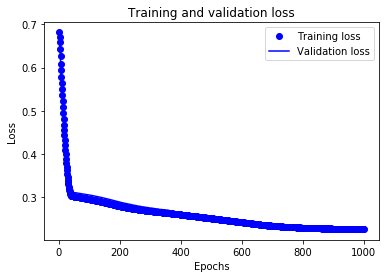

In [400]:
show_training_validation_graph(history.history)

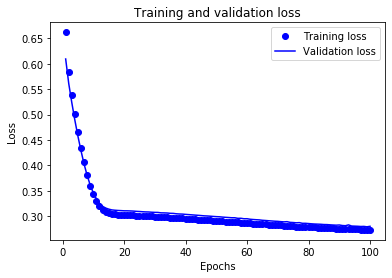

In [173]:
show_training_validation_graph(history.history)

In [404]:
test_adj_close = test_predictors["Adj Close"].to_numpy()
test_target_indices = np.array(list(np.where(test_targets == 1)[0]))
test_prediction_indices = np.array(list(np.where(predictions >= 0.3)[0]))
len(test_prediction_indices)

35

In [405]:
# Constants
window_start = 500
window_end = 600

# Pruning for vizualization
windowed_test_target_indices = test_target_indices[test_target_indices < window_end]
windowed_test_target_indices = windowed_test_target_indices[windowed_test_target_indices >= window_start]
windowed_test_target_indices = windowed_test_target_indices - window_start

windowed_prediction_indices = test_prediction_indices[test_prediction_indices < window_end]
windowed_prediction_indices = windowed_prediction_indices[windowed_prediction_indices >= window_start]
windowed_prediction_indices = windowed_prediction_indices - window_start

windowed_test_adj_close = test_adj_close[window_start:window_end]

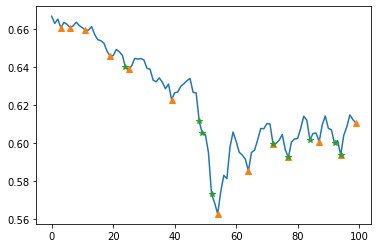

In [406]:
# Visualization
plt.plot(windowed_test_adj_close)
plt.plot(windowed_test_target_indices, windowed_test_adj_close[windowed_test_target_indices], "^")
plt.plot(windowed_prediction_indices, windowed_test_adj_close[windowed_prediction_indices], "*")

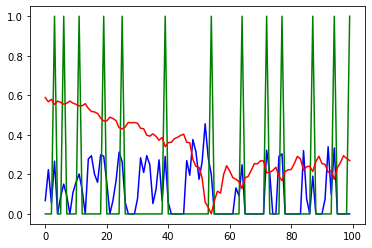

In [407]:
window_start = 500
window_end = 600
treshold = 0.05

windowed_predictions = predictions[window_start:window_end]

for idx, e in enumerate(windowed_predictions):
    if e > treshold:
        windowed_predictions[idx] = e
    else:
        windowed_predictions[idx] = 0.0
    
windowed_actuals = test_targets[window_start:window_end]
windowed_test_adj_close = normalize(test_adj_close)
windowed_test_adj_close = windowed_test_adj_close[window_start:window_end]

plt.plot(windowed_predictions, c="b")
plt.plot(windowed_actuals, c="g")
plt.plot(windowed_test_adj_close, c="r")

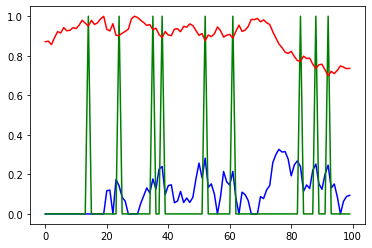

In [246]:
window_start = 0
window_end = 100
treshold = 0.05

windowed_predictions = predictions[window_start:window_end]

for idx, e in enumerate(windowed_predictions):
    if e > treshold:
        windowed_predictions[idx] = e
    else:
        windowed_predictions[idx] = 0.0
    
windowed_actuals = test_targets[window_start:window_end]
windowed_test_adj_close = normalize(test_adj_close)
windowed_test_adj_close = windowed_test_adj_close[window_start:window_end]

plt.plot(windowed_predictions, c="b")
plt.plot(windowed_actuals, c="g")
plt.plot(windowed_test_adj_close, c="r")